# AirBNB Sentiment Analysis

In [1]:
import pandas as pd 
#Load Dataset
sandiego_list = pd.read_csv("listings.csv") 
sandiego_review = pd.read_csv("reviews_edit.csv") 

In [2]:
#Look at the first rows from Listings and Review dataset
display(sandiego_list.head(1),sandiego_review.head(1))

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20230918050343,2023-09-18,previous scrape,Home in San Diego · ★4.81 · 3 bedrooms · 3 bed...,"You read that right, this craftsman home was t...","We have the best Neighborhood in San Diego, in...",https://a0.muscache.com/pictures/miso/Hosting-...,29,...,4.97,4.77,4.8,"STR-04545L, 631067",f,1,1,0,0,0.82


,id,date,reviewer_id,reviewer_name,comments
0,6,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...


# Sentiment Analysis to detect positive/negative Reviews

In [3]:
sandiego_review.isnull().sum()

id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         203
dtype: int64

In [4]:
sandiego_review_withoutna = sandiego_review.dropna(axis=0)
sandiego_review_withoutna.isnull().sum()

id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

f_com = lambda sentence: sid.polarity_scores(sentence)['compound']

sandiego_review['compound'] = sandiego_review_withoutna['comments'].apply(f_com)

In [6]:
f_neg = lambda sentence: sid.polarity_scores(sentence)['neg']

sandiego_review['negative'] = sandiego_review_withoutna['comments'].apply(f_neg)

In [7]:
f_neu = lambda sentence: sid.polarity_scores(sentence)['neu']

sandiego_review['neutral'] = sandiego_review_withoutna['comments'].apply(f_neu)

In [8]:
f_pos = lambda sentence: sid.polarity_scores(sentence)['pos']

sandiego_review['positive'] = sandiego_review_withoutna['comments'].apply(f_pos)

In [9]:
sandiego_review

,id,date,reviewer_id,reviewer_name,comments,compound,negative,neutral,positive
0,6,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...,0.9671,0.000,0.583,0.417
1,6,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...,0.9950,0.007,0.635,0.358
2,6,2012-07-16,1864778,Hieu,This was my first time using Airbnb and Sara m...,0.9562,0.000,0.704,0.296
3,6,2013-07-07,117966,Maria,Sara was a very pleasant host! Reservation was...,0.9842,0.000,0.757,0.243
4,6,2013-07-08,6563815,Mathew,Sara was such an amazing hostess! My girlfrien...,0.9297,0.000,0.723,0.277
...,...,...,...,...,...,...,...,...,...
760802,972756225145030863,2023-09-14,100393257,Maria C,"The place was in a great location , easy to tr...",0.9501,0.000,0.556,0.444
760803,972841948082325213,2023-09-07,215905022,Kamielea,I had a lot of fun staying at this Airbnb. Ale...,0.9838,0.008,0.791,0.201
760804,972841948082325213,2023-09-08,231329188,S,What a delightful space to enjoy! We came as a...,0.9806,0.000,0.764,0.236
760805,973108526049311119,2023-09-11,506879501,Chani,Very clean and the host had great communicatio...,0.8687,0.000,0.479,0.521


#### Sentiment score distribution

Text(0, 0.5, 'frequency')

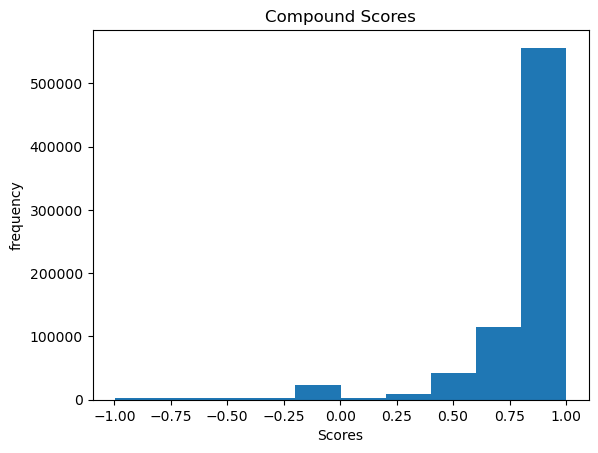

In [10]:
#Histogram plot neutral
import matplotlib.pyplot as plt
pd.Series(sandiego_review['compound']).plot(kind='hist')

plt.title('Compound Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

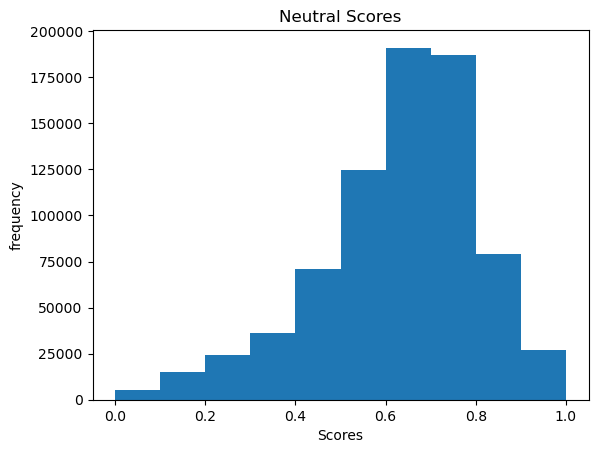

In [11]:
#Histogram plot neutral
pd.Series(sandiego_review['neutral']).plot(kind='hist')

plt.title('Neutral Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

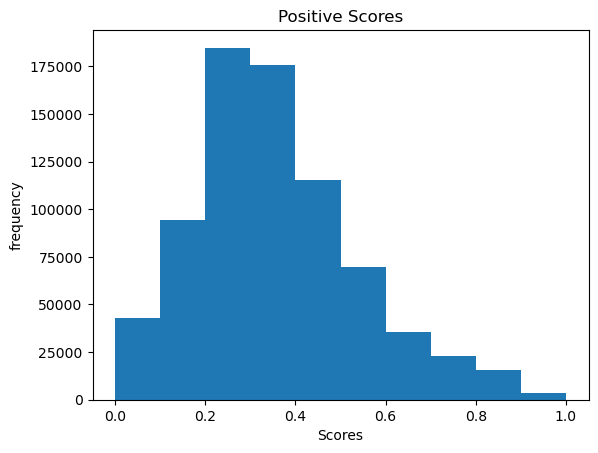

In [12]:
#Histogram plot positive
pd.Series(sandiego_review['positive']).plot(kind='hist')

plt.title('Positive Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

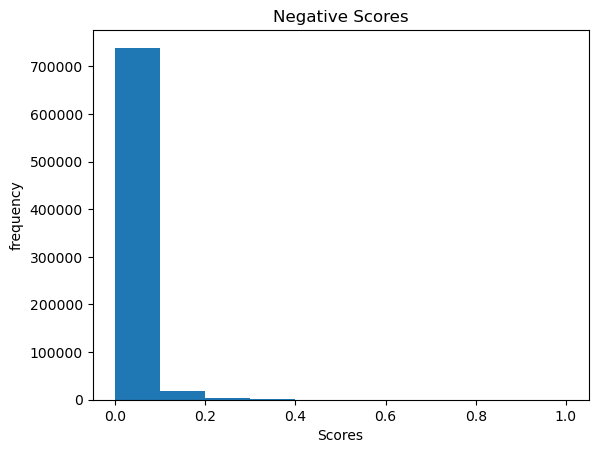

In [13]:
#Histogram plot negative
pd.Series(sandiego_review['negative']).plot(kind='hist')

plt.title('Negative Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

## Visualization - Relationship with other variables

In [14]:
# Inner join list and review data
sandiego_data = pd.merge(left = sandiego_list, right = sandiego_review, how = "inner", on = "id")

In [15]:
sandiego_data.head

<bound method NDFrame.head of                         id                                      listing_url  \
0                        6                   https://www.airbnb.com/rooms/6   
1                        6                   https://www.airbnb.com/rooms/6   
2                        6                   https://www.airbnb.com/rooms/6   
3                        6                   https://www.airbnb.com/rooms/6   
4                        6                   https://www.airbnb.com/rooms/6   
...                    ...                                              ...   
760802  972756225145030863  https://www.airbnb.com/rooms/972756225145030863   
760803  972841948082325213  https://www.airbnb.com/rooms/972841948082325213   
760804  972841948082325213  https://www.airbnb.com/rooms/972841948082325213   
760805  973108526049311119  https://www.airbnb.com/rooms/973108526049311119   
760806  973285217121157648  https://www.airbnb.com/rooms/973285217121157648   

             scrape_i

In [16]:
positive_data = sandiego_data.query('compound > 0.05')

In [17]:
negative_data = sandiego_data.query('compound < -0.05')

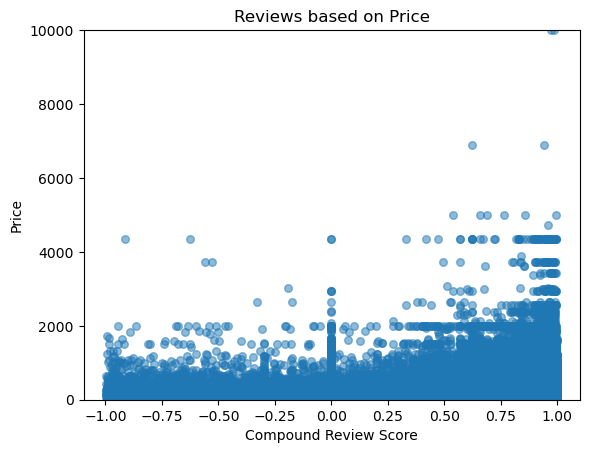

In [18]:
# Extracting prices from the table and cleaning the data
prices = [float(p[1:].replace(',', '')) for p in sandiego_data['price']]

# Create a DataFrame with 'price' and 'compound' columns
price_review = pd.DataFrame({'price': prices, 'compound': sandiego_data['compound']})

# Sort values by 'price'
price_review.sort_values(by='price', inplace=True)

# Plot the scatter plot
plt.scatter(price_review['compound'], price_review['price'], marker='o', s=30, alpha=0.5)

plt.ylim(0, 10000)
plt.title('Reviews based on Price')
plt.xlabel('Compound Review Score')
plt.ylabel('Price')

plt.show()

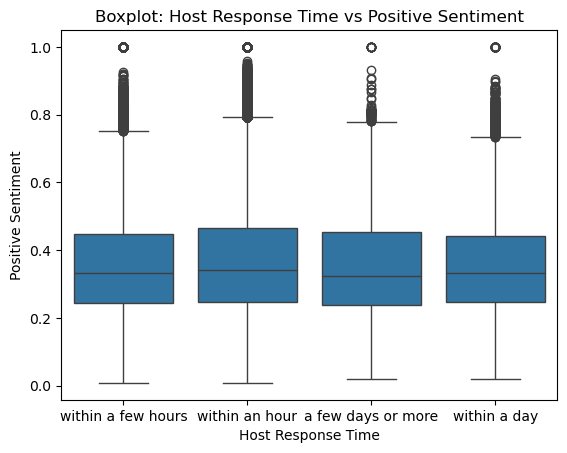

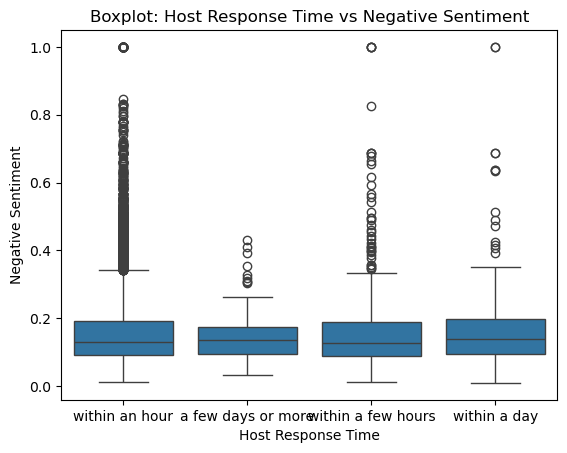

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Grouped by host_response_time vs Positive
sns.boxplot(x='host_response_time', y='positive', data=positive_data)
plt.title('Boxplot: Host Response Time vs Positive Sentiment')
plt.xlabel('Host Response Time')
plt.ylabel('Positive Sentiment')
plt.show()

# Boxplot: Grouped by host_response_time vs Negative
sns.boxplot(x='host_response_time', y='negative', data=negative_data)
plt.title('Boxplot: Host Response Time vs Negative Sentiment')
plt.xlabel('Host Response Time')
plt.ylabel('Negative Sentiment')
plt.show()

# Word Frequency

## Removing Stopwords

In [20]:
#nltk.download()
import nltk
from nltk.corpus import stopwords

In [21]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['t', 'are', 'from', 'now', 'hers', 'then', 'once', 'at', 're', 'this']

In [22]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()])

In [23]:
positive_review = sandiego_review.query('compound > 0.05').query('positive > 0.5')
pos_words_review = convert(positive_review['comments'].fillna("")) #Fill in missing reviews with blank

sd_pos_review_cleaned = [word for word in pos_words_review if word not in stop_words]
sd_pos_review_count = collections.Counter(sd_pos_review_cleaned)

sd_pos_review_count_df = pd.DataFrame(sd_pos_review_count.most_common(),
                             columns=['words', 'count'])

In [24]:
sd_pos_review_count_df

,words,count
0,great,101132
1,place,31968
2,stay,21197
3,location,20837
4,clean,20050
...,...,...
26633,nan,1
26634,ny,1
26635,bless.,1
26636,candle,1


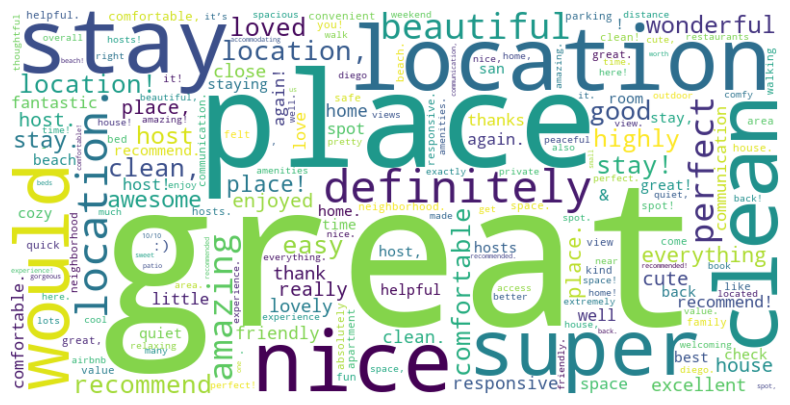

In [29]:
import pandas as pd
from wordcloud import WordCloud

# Create a dictionary from the DataFrame for word cloud input
wordcloud_dict = dict(zip(sd_pos_review_count_df['words'], sd_pos_review_count_df['count']))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
negative_review = sandiego_review.query('compound < - 0.05').query('negative > 0.5')
neg_words_review = convert(negative_review['comments'].fillna("")) #Fill in missing reviews with blank

sd_neg_review_cleaned = [word for word in neg_words_review if word not in stop_words]
sd_neg_review_count = collections.Counter(sd_neg_review_cleaned)

sd_neg_review_count_df = pd.DataFrame(sd_neg_review_count.most_common(),
                             columns=['words', 'count'])

In [31]:
sd_neg_review_count_df

,words,count
0,war,28
1,complaints,26
2,die,23
3,comment,15
4,complaints.,13
...,...,...
486,ausgestattet.,1
487,week,1
488,😁,1
489,heat,1


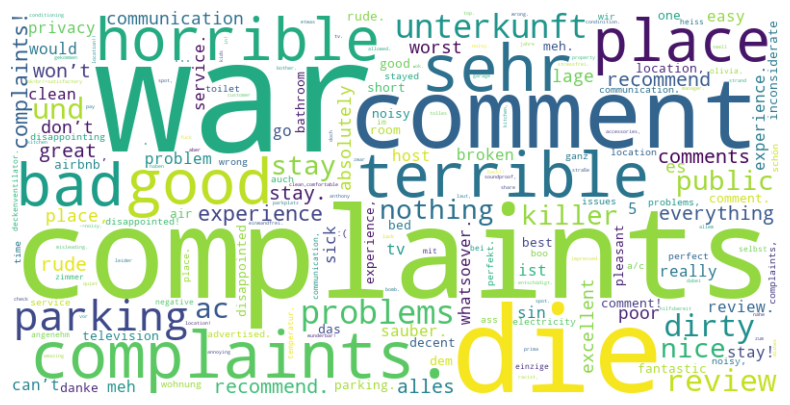

In [32]:
# Create a dictionary from the DataFrame for word cloud input
wordcloud_dict = dict(zip(sd_neg_review_count_df['words'], sd_neg_review_count_df['count']))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()